# HW4 : Expectation-Maximisation algorithm – Importance sampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import logsumexp
from scipy.stats import multivariate_normal 

## Problem 1: Discrete distributions

Q1:

In [ ]:
def discrete_distribution(x, p, size=1) : 
    n = len(p)
    
    ***
    
    return X

In [ ]:
k=5
x = np.arange(k) #np.array([1, 2, 3, 4, 5, 6])
p = np.random.normal(size=k)
p = np.exp(p - logsumexp(p))
print(p, np.sum(p))

[0.05722286 0.06569823 0.34459627 0.30777931 0.22470333] 1.0


Q2:

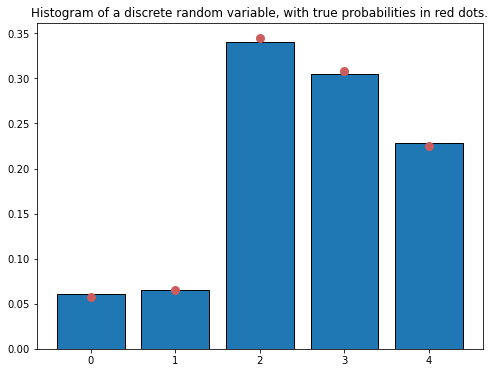

In [ ]:
X = discrete_distribution(x, p, 20_000)
fig = plt.figure(figsize=(8, 6))

plt.title("Histogram of a discrete random variable, with true probabilities in red dots.")
plt.show()

## Problem 2: Gaussian mixture model and the EM algorithm

### technical point : Log-Sum-Exp Trick

At step (E), let us compute: 

$$ \tau_{i, j} \propto \frac{\alpha_j}{\sqrt{2\pi|\Sigma_j|}^d}\exp\left(-\frac{(x_i-\mu_j)^T \Sigma_j^{-1} (x_i-\mu_j)}{2} \right) $$



Q1: （text)

Q2:

In [ ]:
def draw_ellipse(sigma, mu, scale=6) :
    '''draw an ellipse of center mu and psd matrix sigma'''
    U, d, V = np.linalg.svd(sigma)
    t = np.linspace(0, 2*np.pi, 200)
    y1 = np.cos(t)*np.sqrt(scale*d[0])
    y2 = np.sin(t)*np.sqrt(scale*d[1])
    x1 = mu[0] + U[0,0]*y1 + U[0,1]*y2
    x2 = mu[1] + U[1,0]*y1 + U[1,1]*y2
    plt.plot(x1, x2, color="k")

In [ ]:
d = 2
p = 5
n = 5000

In [ ]:
mu = np.random.uniform(-15, 15, size=(p, d))
sigma = np.random.normal(size=(p, d, d))
for j in range(p):
    sigma[j] = np.dot(sigma[j], sigma[j].T)

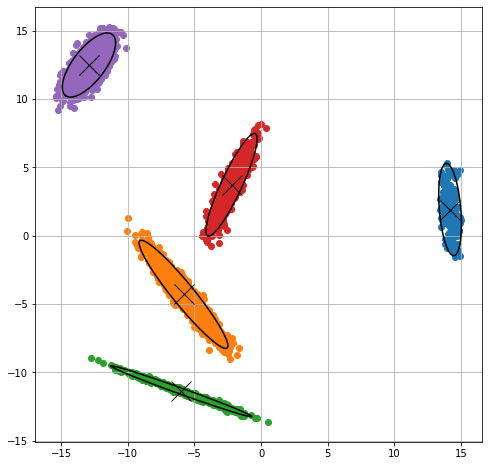

In [ ]:
X=np.zeros((n,d))
fig = plt.figure(figsize=(8, 8))


***

plt.grid()
plt.show()

Q3: (text)

Q4:

In [ ]:
def EM(x, p=4, N_ITER=100) :
    n = len(x)
    d = len(x[0])
    cst = -d/2*np.log(2*np.pi)
    ## parameters initialization
    alpha = np.ones(p)/p
    k = np.random.choice(range(n), size=p)
    mu = np.zeros((p,d))
    mu = x[k]
    
    ***
    
    return mu, sigma, alpha

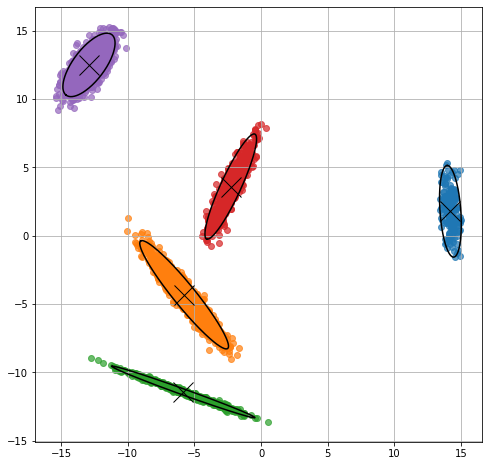

In [ ]:
mu1, sigma1, alphas = EM(X, p=5, N_ITER=60)
fig = plt.figure(figsize=(8, 8))
k=0
n_samples = np.zeros(p).astype(int)

for j in range(p) :
    x = X[k:k+n_samples[j],:]
    plt.scatter(x[:,0], x[:,1], alpha=0.7)
    draw_ellipse(sigma1[j], mu1[j])
    plt.plot(mu1[j, 0], mu1[j, 1], marker="x", markersize=20, color="k")
    k+=n_samples[j]
plt.grid()
plt.show()

Q5: (text)

Q6:

In [ ]:
table = pd.read_csv("WPP2019_Period_Indicators_Medium.csv", sep=",", low_memory=False)
table = table[["CBR", "CDR"]].dropna()
table = table.values

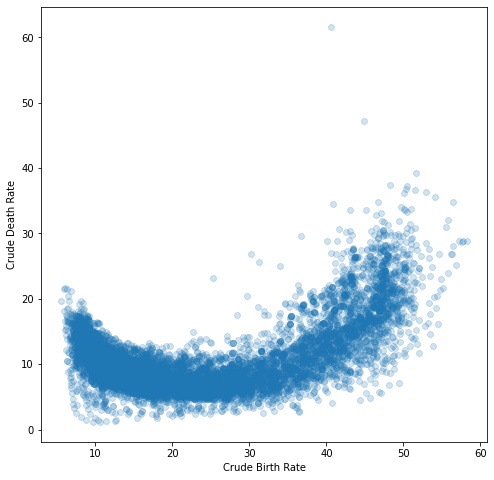

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(table[:,0], table[:,1], alpha=0.2)
plt.xlabel("Crude Birth Rate")
plt.ylabel("Crude Death Rate")
plt.show()

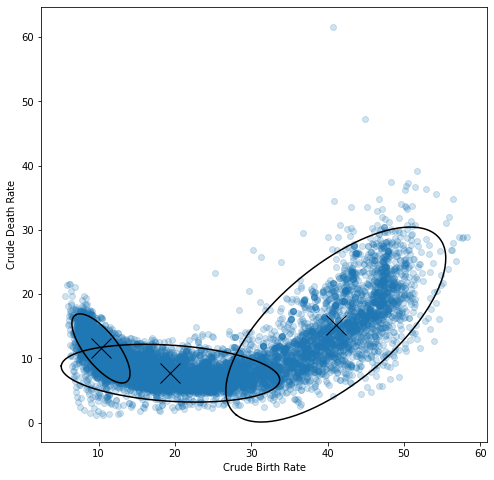

In [ ]:
mu, sigma, alphas = EM(table, p=3, N_ITER=60)
fig = plt.figure(figsize=(8, 8))
for j in range(3) :
    draw_ellipse(sigma[j], mu[j])
    plt.plot(mu[j, 0], mu[j, 1], marker="x", markersize=20, color="k")

plt.scatter(table[:,0], table[:,1], alpha=0.2)
plt.xlabel("Crude Birth Rate")
plt.ylabel("Crude Death Rate")
plt.show()

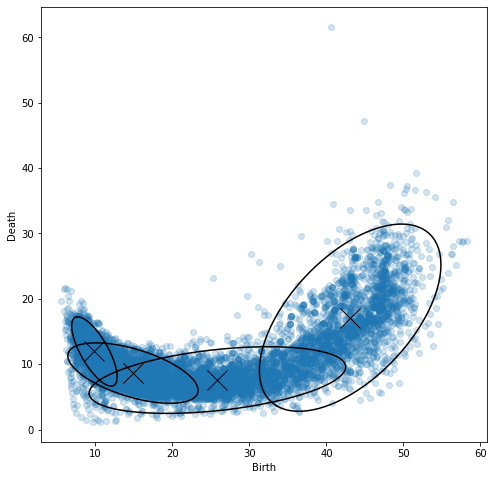

In [ ]:
p = 4
mu, sigma, alphas = EM(table, p, N_ITER=60)
fig = plt.figure(figsize=(8, 8))
for j in range(p) :
    draw_ellipse(sigma[j], mu[j])
    plt.plot(mu[j, 0], mu[j, 1], marker="x", markersize=20, color="k")

plt.scatter(table[:,0], table[:,1], alpha=0.2)
plt.xlabel("Birth")
plt.ylabel("Death")
plt.show()

In [ ]:
def BIC(x, mu, sigma, alpha, p) :
    n = len(x)
    d = len(x[0])
    cst = -d*np.log(2*np.pi)/2
    BIC = 0
    log_pdfs = np.ones((p, n))
    df = p*(d+1)*(d+2)/2 - 1
    
    ****

    return BIC

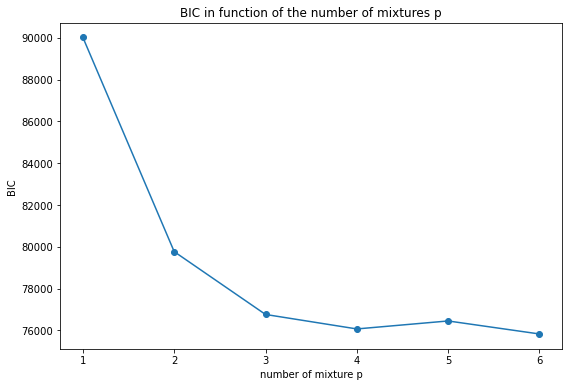

In [ ]:
fig = plt.figure(figsize=(9,6))
plt.plot(range(1, M), bics, ls='-', marker='o')
plt.xlabel("number of mixture p")
plt.ylabel("BIC")
plt.title("BIC in function of the number of mixtures p")
plt.show()

## Problem 3 : Importance sampling

### A. Poor Importance Sampling

Q1:

In [ ]:
mu = 0.8
sigma2 = 1.5
N = 10000

In [ ]:
def f(x) :
    return 2*np.sin(np.pi*x / sigma2) * (x>=0)

def p(x) :
    return x**(0.65) * np.exp(-x**2/2) * (x>=0)

def q(x, mu=0.8) :
    return np.exp(-(x-mu)**2 / (2*sigma2)) / np.sqrt(2*sigma2)

In [ ]:
def importance_sampling_estimator(x, f, p, q, mu=0.8) :
    "Importance sampling estimator with x drawn from q"
    return ***

In [ ]:
def sample_from_q(mu=0.8, sigma2=1.5, N=10000) :
    x = np.zeros(N)
    
    ***

    
    return x #abs(np.random.normal(loc=mu, scale=sigma2, size=N))

In [ ]:
x = sample_from_q(mu=0.8, sigma2=1.5, N=10000)

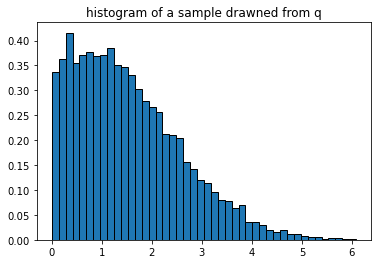

In [ ]:
plt.hist(x, bins='auto', edgecolor="k", density=True)
plt.title("histogram of a sample drawned from q")
plt.show()

Q2:

In [ ]:
n = 1000
samples = np.zeros((4, n))

In [ ]:
for i, N in enumerate([10, 100, 1000, 10_000]) :
    for j in range(n) :
        x = sample_from_q(0.8, 1.5, N)
        samples[i, j] = importance_sampling_estimator(x, f, p, q, mu=0.8)
    print("Importance sampling estimator for N = {} : {:.2f}".format(N, importance_sampling_estimator(x, f, p, q, mu=0.8)))

Importance sampling estimator for N = 10 : -0.10
Importance sampling estimator for N = 100 : 0.71
Importance sampling estimator for N = 1000 : 0.71
Importance sampling estimator for N = 10000 : 0.69


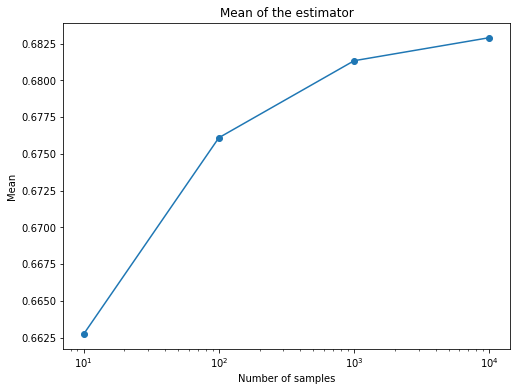

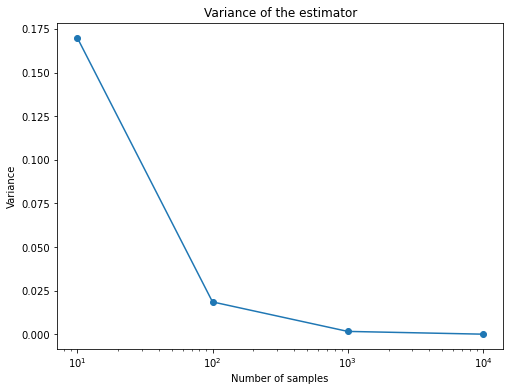

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot([10, 100, 1000, 10_000], np.mean(samples, axis=1), marker='o')
plt.title("Mean of the estimator")
plt.xscale("log")
plt.xlabel("Number of samples")
plt.ylabel("Mean")
plt.show()

fig = plt.figure(figsize=(8, 6))
plt.plot([10, 100, 1000, 10_000], np.var(samples, axis=1), marker='o')
plt.title("Variance of the estimator")
plt.xlabel("Number of samples")
plt.ylabel("Variance")
plt.xscale("log")
plt.show()

Q3: (add explainations)

Let's shift the mean to $\mu = 6$ : 

In [ ]:
for i, N in enumerate([10, 100, 1000, 10_000]) :
    for j in range(n) :
        x = sample_from_q(6, 1.5, N)
        samples[i, j] = importance_sampling_estimator(x, f, p, q, mu=6)
    print("Importance sampling estimator for N = {} : {:.2f}".format(N, importance_sampling_estimator(x, f, p, q, mu=6))) 

Importance sampling estimator for N = 10 : 1.22
Importance sampling estimator for N = 100 : -1.87
Importance sampling estimator for N = 1000 : -1.64
Importance sampling estimator for N = 10000 : 1.31


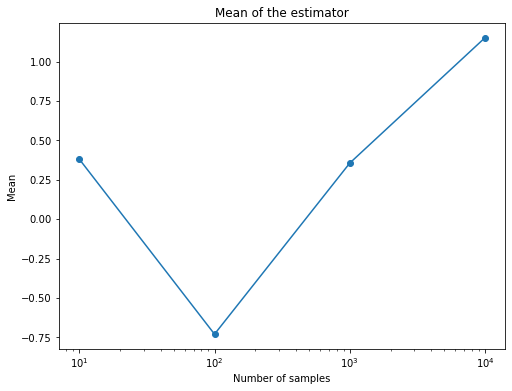

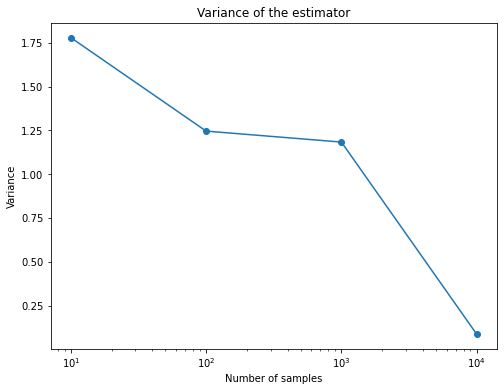

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot([10, 100, 1000, 10_000], np.mean(samples, axis=1), marker='o')
plt.title("Mean of the estimator")
plt.xscale("log")
plt.xlabel("Number of samples")
plt.ylabel("Mean")
plt.show()

fig = plt.figure(figsize=(8, 6))
plt.plot([10, 100, 1000, 10_000], np.var(samples, axis=1), marker='o')
plt.title("Variance of the estimator")
plt.xlabel("Number of samples")
plt.ylabel("Variance")
plt.xscale("log")
plt.show()

0.7382835004672867
0.9382987666415485


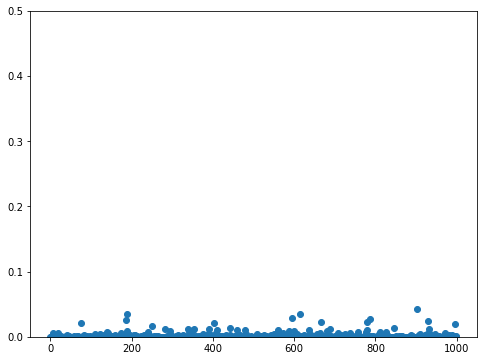

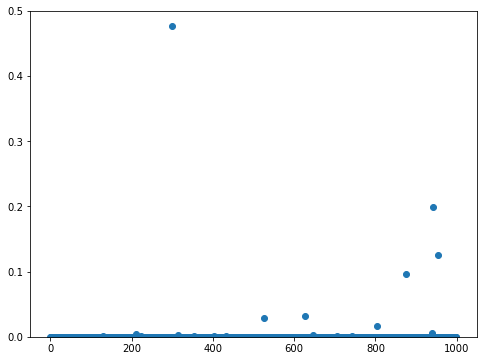

In [ ]:
N = 1_000

fig = plt.figure(figsize=(8, 6))
y = sample_from_q(0.8, 1.5, N)
plt.plot(p(x)/q(x, mu=0.8) / np.sum(p(x)/q(x, mu=0.8)), 'o')
plt.ylim([0, 0.5])
print(np.linalg.norm(p(x)))

fig = plt.figure(figsize=(8, 6))
x = sample_from_q(6, 1.5, N)
plt.plot(p(x)/q(x, mu=6)/np.sum(p(x)/q(x, mu=6)), 'o')
plt.ylim([0, 0.5])
print(np.linalg.norm(p(x)))
plt.show()